In [ ]:
!pip install ultralytics opencv-python numpy roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import random

def detect_objects(image, model, conf=0.5):
  results = model(image, conf=conf)
  # Generate unique colors for each class
  class_colors = {}

  # Visualize results
  for result in results:
      boxes = result.boxes  # Boxes object for bbox outputs
      for box in boxes:
          # Get box coordinates
          x1, y1, x2, y2 = box.xyxy[0]  # box with xyxy format, (N, 4)
          conf = box.conf[0]  # confidence score
          cls = int(box.cls[0])
          label = model.names[cls]

          # Assign a random color to each class (if not already assigned)
          if cls not in class_colors:
              class_colors[cls] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

          color = class_colors[cls]  # Get the color for this class

          # Draw rectangle
          cv2.rectangle(image,
                      (int(x1), int(y1)),
                      (int(x2), int(y2)),
                      color, 2)

          # Prepare text
          text = f'{label} {conf:.2f}'
          font_scale = 0.5
          font_thickness = 2
          text_color = (10, 10, 10)  # Black text

          # Get text size
          (text_width, text_height), _ = cv2.getTextSize(
              text,
              cv2.FONT_HERSHEY_SIMPLEX,
              font_scale,
              font_thickness
            )

          # Set background rectangle coordinates
          text_x, text_y = int(x1), int(y1) - 5
          rect_x1, rect_y1 = text_x, text_y - text_height - 5  # Top-left corner
          rect_x2, rect_y2 = text_x + text_width, text_y + 5  # Bottom-right corner

          # Draw filled rectangle (background for text)
          cv2.rectangle(image, (rect_x1, rect_y1), (rect_x2, rect_y2), color, -1)

          # Add confidence score
          cv2.putText(
              image,
              text,
              (text_x, text_y),
              cv2.FONT_HERSHEY_SIMPLEX,
              font_scale,
              text_color,
              font_thickness
          )

  # Show the image
  cv2_imshow(image)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 448x640 1 donut, 52.1ms
Speed: 2.6ms preprocess, 52.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


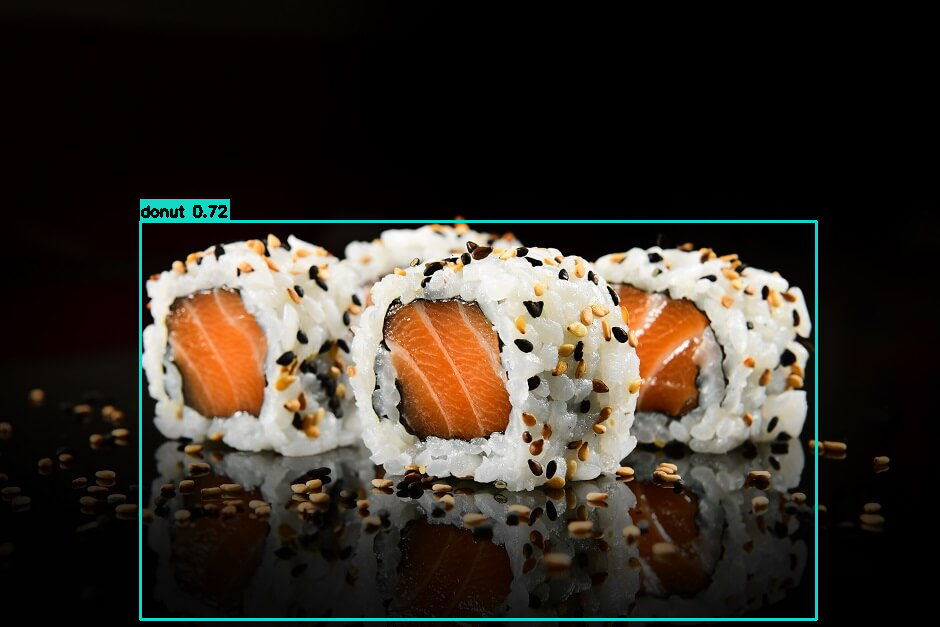

In [ ]:
# Load your trained model
model = YOLO('yolov8l.pt')

# Perform detection on an image
image = cv2.imread('sushis.jpg')

detect_objects(image, model)

In [ ]:
from roboflow import Roboflow
import os

rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY")) # TODO - put this on .env
project = rf.workspace("silantiev-maksim").project("projectssushi")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

# Load the pre-trained model
new_model = YOLO("yolov8l.pt")

# Freeze backbone layers
for name, param in new_model.model.named_parameters():
    if any(x in name for x in ['model.0', 'model.1', 'model.2', 'model.3', 'model.4']):
        param.requires_grad = False  # Freeze early layers
    else:
        param.requires_grad = True   # Train later layers

# Train with transfer learning
new_model.train(
    data="/content/ProjectsSushi-3/data.yaml",  # Path to dataset YAML
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size
    batch=8,  # Adjust based on available GPU memory
    workers=2,  # Number of CPU threads for data loading
    device="cuda",  # Use GPU if available
    patience=5
)


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ProjectsSushi-3/data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/ProjectsSushi-3/train/labels.cache... 314 images, 0 backgrounds, 0 corrupt: 100%|██████████| 314/314 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/ProjectsSushi-3/valid/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.91G      1.718      2.342      1.837         11        640: 100%|██████████| 40/40 [00:17<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957     0.0384      0.441     0.0293     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.76G       1.85      1.805      1.916         23        640: 100%|██████████| 40/40 [00:16<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957     0.0172      0.182     0.0096    0.00313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.71G      1.889      1.909      2.005         23        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        254       2957      0.014      0.115    0.00611    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.86G      1.957      1.811      2.083         29        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.62it/s]

                   all        254       2957    0.00567      0.138    0.00318    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.87G      1.954      1.958      2.054         26        640: 100%|██████████| 40/40 [00:16<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        254       2957     0.0414      0.229     0.0209    0.00626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.87G      1.848      1.683      1.911         25        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        254       2957      0.476      0.443      0.397      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.91G        1.8      1.666       1.93         33        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]

                   all        254       2957       0.33      0.301      0.225     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.92G      1.832      1.705      1.915         15        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        254       2957      0.525      0.502      0.467      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.9G      1.741      1.553      1.861         15        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

                   all        254       2957      0.127      0.353      0.138     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.88G      1.733      1.539      1.873          8        640: 100%|██████████| 40/40 [00:16<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        254       2957      0.606      0.548       0.56      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.84G      1.677      1.435      1.801         36        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        254       2957      0.544      0.515      0.485      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.91G      1.667      1.388      1.786         24        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]

                   all        254       2957      0.587      0.521       0.53      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       7.9G      1.695      1.448       1.84         28        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957      0.546      0.462      0.458      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.88G      1.646      1.409        1.8         74        640: 100%|██████████| 40/40 [00:16<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        254       2957      0.612      0.542      0.549      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       7.9G      1.637      1.396      1.773         15        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.87it/s]

                   all        254       2957       0.62      0.575      0.581      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.87G      1.588      1.341      1.737         16        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        254       2957      0.628      0.577       0.58      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.91G      1.602      1.279      1.745         24        640: 100%|██████████| 40/40 [00:16<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        254       2957      0.661      0.536      0.569      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.86G      1.616      1.297      1.766         35        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]

                   all        254       2957      0.663      0.581      0.617       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.84G       1.62      1.302      1.773         46        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]

                   all        254       2957      0.599      0.534       0.54      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.85G      1.572      1.276      1.764         37        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        254       2957      0.648      0.577      0.599      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.87G      1.544      1.295      1.729         16        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        254       2957      0.646      0.567      0.594      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       7.9G      1.542      1.199      1.708         32        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]

                   all        254       2957      0.687      0.582      0.615      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.87G      1.579       1.22       1.72         19        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.77it/s]

                   all        254       2957      0.671       0.63      0.634      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.86G      1.559      1.173      1.688         32        640: 100%|██████████| 40/40 [00:16<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        254       2957      0.673      0.602      0.625      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.9G      1.503      1.202      1.719          8        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

                   all        254       2957      0.657      0.516       0.56      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.89G      1.518      1.151      1.689          7        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957      0.677       0.59       0.62      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       7.9G      1.475      1.141      1.686          8        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.83it/s]

                   all        254       2957      0.635      0.621      0.624      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       7.9G      1.458      1.081      1.636         11        640: 100%|██████████| 40/40 [00:16<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        254       2957      0.695        0.6      0.635      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.85G      1.468      1.063      1.658          7        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957      0.705      0.611      0.652      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.86G      1.459      1.039       1.64         11        640: 100%|██████████| 40/40 [00:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]

                   all        254       2957      0.675      0.641       0.65       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.89G      1.457      1.065      1.638         21        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]

                   all        254       2957      0.705      0.616      0.644      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.84G       1.44      1.044      1.644         17        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.84it/s]

                   all        254       2957      0.715      0.642      0.675      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       7.9G      1.457     0.9839      1.621         19        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.92it/s]

                   all        254       2957      0.703      0.642      0.674      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.85G      1.407     0.9985       1.61         11        640: 100%|██████████| 40/40 [00:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.81it/s]

                   all        254       2957      0.663      0.603      0.632      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.92G      1.438     0.9596      1.589         25        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]

                   all        254       2957      0.716       0.62      0.658      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.85G      1.399     0.9458      1.608         37        640: 100%|██████████| 40/40 [00:16<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]

                   all        254       2957      0.708      0.609      0.648      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.86G      1.395     0.9636       1.59         24        640: 100%|██████████| 40/40 [00:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.82it/s]

                   all        254       2957      0.715      0.609      0.657      0.267
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 0.301 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 87.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.93it/s]


                   all        254       2957      0.714      0.642      0.675      0.272
                 Sushi        254       2957      0.714      0.642      0.675      0.272
Speed: 0.5ms preprocess, 17.4ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5a939f5590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


0: 448x640 3 Sushis, 49.6ms
Speed: 3.8ms preprocess, 49.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


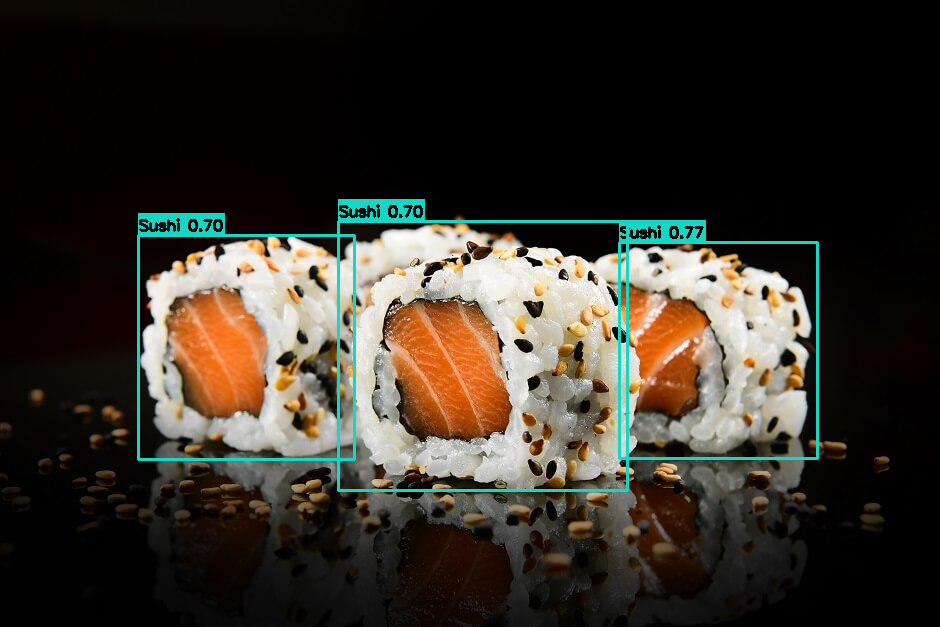

In [ ]:
image = cv2.imread('sushis.jpg')

detect_objects(image, new_model)